#### **MDI220 - Statistiques** (Année 2022/2023)

#**Mini-Projet**

**Étudiant :** Ivan Luiz DE MOURA MATOS

---

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#### **Exercice 1** (Exploration des données, recherche de leur loi)

**Question 1**

In [ ]:
# Création d'une fonction pour vérifier si une date 'date1' est antérieure
# à une date 'date2'. La fonction retourne True si et seulement si 'date1'
# est antérieure à 'date2'.
# Remarque : Les dates doivent avoir le format 'mois/jour/année'.

def date_comparison(date1, date2):

    m1, d1, y1 = date1.split('/')
    m1, d1, y1 = int(m1), int(d1), int(y1)

    m2, d2, y2 = date2.split('/')
    m2, d2, y2 = int(m2), int(d2), int(y2)

    if (y1 < y2):  return True
    if (y1 > y2):  return False

    if (m1 < m2):  return True
    if (m1 > m2):  return False

    if (d1 < d2):  return True
    if (d1 >= d2): return False

In [ ]:
# Initialement, les données seront stockées dans un dataframe df
df = pd.read_csv('NuclearPowerAccidents2016.csv')

Après la stockage des données dans un DataFrame, on peut filtrer les données et obtenir le vecteur des coûts des accidents strictement avant l'accident de Three Mile Island. (Les valeurs sont indiquées en millions de dollars.)

Pour filtrer les données, on utilise des "boolean masks". Le vecteur résultant est ``costs``.

In [ ]:
# "Boolean mask" pour effectuer la suppression de toutes les observations avec
# date ou coût manquantes
mask1 = df['Date'].notnull() & df['Cost (millions 2013US$)'].notnull()

# "Boolean mask" pour obtenir seulement les données relatifs aux accidents avant
# l'accident de Three Mile Island
mask2 = df['Date'].map(lambda x: date_comparison(x,'3/28/1979'))

# Obtention d'un vecteur (numpy array) des coûts des accidents avant l'accident
# de Three Mile Island
costs = (df[mask1 & mask2])['Cost (millions 2013US$)'].to_numpy()

On montre, maintenant, le vecteur de coûts qu'on a obtenu :

In [ ]:
costs

array([8.1890e+03, 4.4000e+03, 3.5000e+03, 2.9000e+03, 2.5000e+03,
       1.9645e+03, 1.9000e+03, 1.7334e+03, 1.5000e+03, 1.3300e+03,
       1.3000e+03, 1.1000e+03, 1.1000e+03, 9.9000e+02, 8.0000e+02,
       7.9390e+02, 7.8840e+02, 5.4140e+02, 5.1150e+02, 4.2520e+02,
       2.7710e+02, 1.8000e+02, 1.5000e+02, 1.0000e+02, 1.0000e+02,
       9.9500e+01, 9.8000e+01, 8.9900e+01, 8.7700e+01, 8.4500e+01,
       7.7000e+01, 6.0100e+01, 5.2400e+01, 3.8000e+01, 3.7500e+01,
       2.5700e+01, 2.5700e+01, 1.7100e+01, 1.6100e+01, 1.5000e+01,
       1.3900e+01, 1.1800e+01, 1.1400e+01, 6.1000e+00, 4.4000e+00,
       1.2000e+00, 1.1000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

On peut vérifier que le vecteur de coûts est composé effectivement de 55 observations :

In [ ]:
len(costs)  # Taille du vecteur de coûts

55

---
**Question 2**

**2. (a)**
L'objecfif est de montrer que la fonction quantile d'une loi normale $\mathcal{N}(\mu,\sigma^2)$, notée $F^{-1}(p;\mu,\sigma^2)$, vérifie
$$
\forall p \in ]0,1[, \quad F^{-1}(p;\mu,\sigma^2) = \mu + \sqrt{\sigma^2}F^{-1}(p;0,1).
$$
\
La fonction de densité $f$ correspondante à la loi normale $\mathcal{N}(\mu,\sigma^2)$ est définie par $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\cdot\exp\Big[-\frac{(x-\mu)^2}{2\sigma^2}\Big]$. Pour la fonction de repartition
$F(\; \cdot\; ;\mu,\sigma^2)$, on obtient :
$$
F(x;\mu,\sigma^2)
= \int_{-\infty}^{x} f(y)dy
= \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-\infty}^{x} \exp\Big[-\frac{(y-\mu)^2}{2\sigma^2}\Big]dy
$$
$$
= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\frac{x-\mu}{\sqrt{\sigma^2}}} \exp\Big[-\frac{z^2}{2}\Big]dz
\quad \quad \Big(\textrm{on définit} \quad z = \frac{y-\mu}{\sqrt{\sigma^2}}\Big)
$$
\
On a, donc :  
$$
F(x;\mu,\sigma^2) = F\Big(\frac{x-\mu}{\sqrt{\sigma^2}};0,1\Big)
\quad \quad \textrm{(Eq. 1)}
$$
\
Puisque la densité $f$ est strictement positive, la fonction $F(\;\cdot\;;\mu,\sigma^2)$ est strictement croissante. Alors la fonction quantile $F^{-1}(\;\cdot\;;\mu,\sigma^2)$ correspond à la fonction réciproque de $F(\;\cdot\;;\mu,\sigma^2)$ (ici, on considère que $\mu$ et $\sigma$ sont fixés). Donc pour une valeur de $p$ donnée (avec $p \in ]0,1[$), on note
$$
F^{-1}(p;\mu,\sigma^2) = x
\quad \quad \textrm{(Eq. 2)}$$
pour indiquer que
$$
F(x;\mu,\sigma^2) = p.
\quad \quad \textrm{(Eq. 3)}
$$
\
\
Dans l'équation $1$, si on substitue $x$ et $F(x;\mu,\sigma^2)$ par les expressions présentes dans les équations $2$ et $3$ respectivement, on obtient
$$
p = F\Big(\frac{F^{-1}(p;\mu,\sigma^2)-\mu}{\sqrt{\sigma^2}};0,1\Big)
$$
\
En appliquant la fonction $F^{-1}(\;\cdot\; ; 0,1)$ aux deux côtés de cette équation, on obtient
$$
F^{-1}(p; 0,1) = \frac{F^{-1}(p;\mu,\sigma^2)-\mu}{\sqrt{\sigma^2}}
$$

Finalement, on peut écrire
$$
F^{-1}(p;\mu,\sigma^2) = \mu + \sqrt{\sigma^2} \cdot F^{-1}(p; 0,1), \quad \forall p \in ]0,1[.
\quad \quad \quad
\blacksquare
$$









**2.(b)**
On trace le QQ-plot de données pour la **loi normale** :

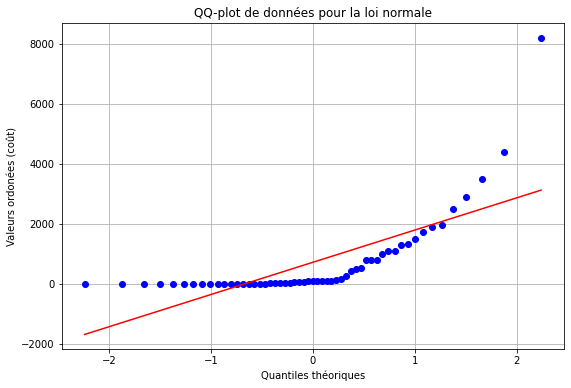

In [ ]:
plt.figure(figsize=(9, 6))
stats.probplot(costs, dist='norm', fit=True, plot=plt)

plt.title('QQ-plot de données pour la loi normale')
plt.xlabel('Quantiles théoriques')
plt.ylabel('Valeurs ordonées (coût)')

plt.grid()
plt.show()

---
**Question 3**

**3. (a)**
Maintenant, on est intéressé à montrer que pour un quantile d'une loi exponentielle $\lambda$ on a
$$
\forall p \in (0,1), \quad F^{-1}(p;\lambda) = \frac{1}{\lambda}F^{-1}(p;1).
$$
\
La fonction densité $f$ correspondante à la loi exponentiele de paramètre $\lambda$ est définie par
$$
f(x)=\begin{cases}
0, \quad \textrm{si} \quad x < 0\\
\lambda\cdot\textrm{e}^{-\lambda\cdot x}, \quad \textrm{si} \quad x >= 0
\end{cases}
$$

La fonction de répartition $F(x;\lambda)$ associé à la loi est donc

$$
F(x;\lambda) = \int_{-\infty}^{x} f(y)dy
$$

$$
= \begin{cases}
0, \quad \textrm{si} \quad x < 0\\
\int_{0}^{x} \lambda\cdot\textrm{e}^{-\lambda\cdot y} dy, \quad \textrm{si} \quad x >= 0
\end{cases}
$$

$$
= \begin{cases}
0, \quad \textrm{si} \quad x < 0\\
1 - \textrm{e}^{-\lambda x}, \quad \textrm{si} \quad x >= 0
\end{cases}
$$
\
Pour $p \in ]0,1[$, la fonction quantile $F^{-1}(p;\lambda)$ de la loi exponentielle de paramètre $\lambda$ peut être obtenue en exprimant la valeur de $x$ tel que $F(x;\lambda) = p$ :

$$
F(x;\lambda) = p \iff 1 - \textrm{e}^{-\lambda x} = p
\iff \textrm{e}^{-\lambda x} = 1-p
$$
$$
\iff x = - \frac{\ln(1-p)}{\lambda}
$$

Alors pour $p \in ]0,1[$,
$$
F^{-1}(p;\lambda) = - \frac{\ln(1-p)}{\lambda}
$$

À partir de cette équation, on peut noter que $F^{-1}(p;1)=-\ln(1-p)$. Donc finalement on peut écrire :
$$
F^{-1}(p;\lambda)= \frac{1}{\lambda} \cdot F^{-1}(p;1), \quad \forall p \in ]0,1[.
\quad \quad \quad
\blacksquare
$$

**3. (b)**

On trace le QQ-plot de données pour la **loi exponentielle** :

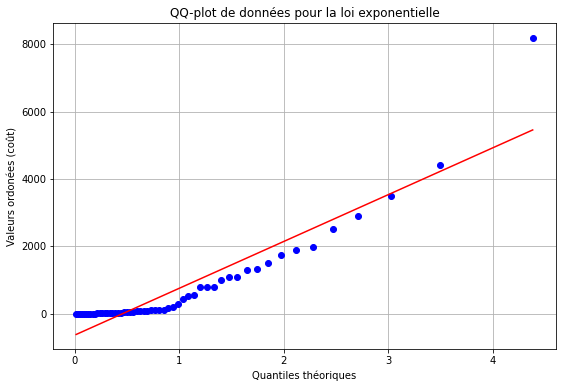

In [ ]:
plt.figure(figsize=(9, 6))
stats.probplot(costs, dist='expon', fit=True, plot=plt)

plt.title('QQ-plot de données pour la loi exponentielle')
plt.xlabel('Quantiles théoriques')
plt.ylabel('Valeurs ordonées (coût)')

plt.grid()
plt.show()

---
**Question 4**

En comparant les deux QQ-plots obtenus, on peut voir que le modèle exponentielle "s'ajuste mieux" aux données (c'est-à-dire, les points bleus sont plus proches de la courbe rouge dans le QQ-plot pour la loi exponentielle, en général). Pour cette raison, la **loi exponentielle** semble être plus plausible pour les données.

---
---

#### **Exercice 2** (Estimation ponctuelle des paramètres d’une loi exponentielle)

**Question 1**

Puisqu'on considère que les $n$ observations $X_i$ sont indépendants et identiquement distribués (i.i.d.), la vraisemblance $L$ de l'échantillon est donnée par le produit des fonctions de densité $f_i$ des $X_i$ :

$$
L(x_1,...,x_n;\lambda) = \prod_{i=1}^{n}f(x_i;\lambda).
$$

On suppose que les $x_i$ sont positifs, donc $f(x_i;\lambda) = \lambda\cdot\exp(-\lambda x_i)$ pour chaque $i$, et

$$
L(x_1,...,x_n;\lambda) = \prod_{i=1}^{n} \lambda\cdot\exp(-\lambda x_i)
= \lambda^n \cdot \exp\Big(-\lambda\cdot\sum_{i=1}^{n}x_i\Big).
$$

La valeur $\widehat{\lambda}_n$ de $\lambda$ qui maximise $L(x_1,...,x_n;\lambda)$ est la même qui maximise $\ln(L(x_1,...,x_n;\lambda))$, car le logarithme népérien $\ln(\cdot)$ est une fonction monotone croissante.

On a :
$$
\ln(L(x_1,...,x_n;\lambda))
= \ln\Big(\lambda^n \cdot \exp\Big(-\lambda\cdot\sum_{i=1}^{n}x_i\Big) \Big)
$$
$$
= \ln(\lambda^n) + \ln\Big( \exp\Big(-\lambda\cdot\sum_{i=1}^{n}x_i\Big) \Big)
$$
$$
= n\cdot \ln(\lambda) - \lambda \cdot \sum_{i=1}^{n}x_i
$$

La dérivée de $\ln(L(x_1,...,x_n;\lambda))$ par rapport à $\lambda$ est
$$
\frac{\partial}{\partial \lambda} \ln(L(x_1,...,x_n;\lambda)) = \frac{\partial}{\partial \lambda} \Big[n\cdot \ln(\lambda) - \lambda \cdot \sum_{i=1}^{n}x_i \Big]
$$
$$
= \frac{n}{\lambda} -\sum_{i=1}^{n}x_i
$$

La valeur de $\lambda$ qui annule $\frac{\partial}{\partial \lambda} \ln(L(x_1,...,x_n;\lambda))$ est

$$
\frac{n}{\sum_{i=1}^{n}x_i}
$$

Pour vérifier que $L(x_1,...,x_n;\lambda)$ atteint la valeur maximum pour $\lambda = \frac{n}{\sum_{i=1}^{n}x_i}$, il suffit de montrer que la dérivée seconde de cette fonction est negative dans ce point. On a

$$
\frac{\partial^2}{\partial \lambda^2} \ln(L(x_1,...,x_n;\lambda)) = \frac{\partial}{\partial \lambda} \Big( \frac{n}{\lambda} -\sum_{i=1}^{n}x_i \Big) = -\frac{n}{\lambda^2} < 0
$$

Finalement, on peut conclure que l’estimateur du maximum de vraisemblance $\widehat{\lambda}_n$ pour le paramètre de la loi exponentielle est :
$$
\widehat{\lambda}_n =
\frac{n}{\sum_{i=1}^{n}x_i}.
\quad \quad \quad \quad
\blacksquare
$$


Pour l'échantillon donnée, on a :

In [ ]:
estimateur_lambda = len(costs) / costs.sum()

print('Valeur du estimateur pour le paramètre lambda :', estimateur_lambda)

Valeur du estimateur pour le paramètre lambda : 0.0013767725947156965


---
**Question 2**

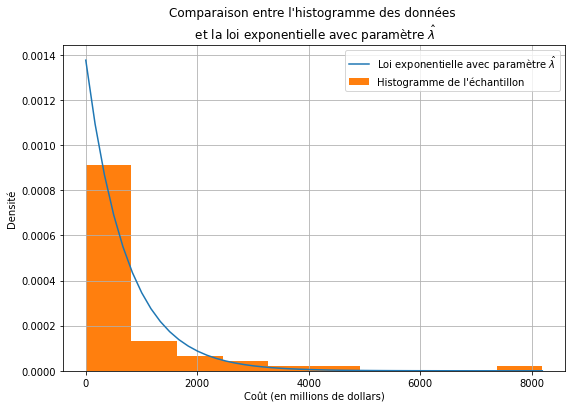

In [ ]:
plt.figure(figsize=(9, 6))

costs_linspace = np.linspace(costs.min(),costs.max())
exponential = estimateur_lambda*np.exp(-estimateur_lambda*costs_linspace)
plt.plot(costs_linspace, exponential)
plt.hist(costs, density=True)
plt.legend(['Loi exponentielle avec paramètre $\\hat{\\lambda}$','Histogramme de l\'échantillon'])

plt.title('Comparaison entre l\'histogramme des données \n et la loi exponentielle avec paramètre $\\hat{\\lambda}$')
plt.xlabel('Coût (en millions de dollars)')
plt.ylabel('Densité')

plt.grid()
plt.show()

---
**Question 3**

On admet que le modèle $\{P_\lambda,\lambda>0\}$ est régulier. Pour que $T_1(X) = \frac{1}{n}\sum_{i=1}^{n}$ soit un estimateur efficace pour $g_1(\lambda) = \frac{1}{\lambda}$, il faut que deux conditions soient satisfaites pour tout $\lambda > 0$ (cf. page 39 de la polycopié):


**(i).**   $\mathbb{E}_\lambda [T_1(X)] = g_1(\lambda)$, et

**(ii).**   $\textrm{Var}_\lambda\Big( T_1(X)\Big)
= \frac{[g'_1(\lambda)]^2}{I(\lambda)}$, où $I(\lambda)
= -\mathbb{E}_\lambda\Big[ \frac{\partial^2}{\partial\lambda^2} \ln(L(X;\lambda)) \Big]$.
\
\
Initialement, on montre que la condition **(i)** ci-dessus est vérifiée. En effet,

$$
\mathbb{E}_\lambda[T_1(X)]
= \mathbb{E}_\lambda \Big[ \frac{\sum_{i=1}^{n}X_i}{n} \Big]
= \frac{1}{n}\cdot\mathbb{E}_\lambda \Big[ \sum_{i=1}^{n}X_i \Big] = \frac{1}{n}\cdot \Big(n\cdot \frac{1}{\lambda}\Big) = \frac{1}{\lambda}
$$

(Ici, on a utilisé le fait que, pour $X_i \sim \mathcal{E}(\lambda) $, on a $\mathbb{E}_\lambda(X_i) = 1/\lambda$.)

La condition **(i)** est donc satisfaite : $\mathbb{E}_\lambda[T_1(X)] = \frac{1}{\lambda} = g_1(\lambda)$.
\
\
Maintenant, on montre que la condition **(ii)** est aussi vérifiée. On a :

$$
\textrm{Var}_\lambda\Big( T_1(X)\Big)
= \textrm{Var}_\lambda\Big(\frac{1}{n}\sum_{i=1}^{n}X_i\Big)
= \Big(\frac{1}{n}\Big)^2 \cdot \sum_{i=1}^{n}\textrm{Var}_\lambda(X_i)
$$
Ici, on a utilisé les proprietés du calcul de la variance, et aussi le fait que les variables aléatoires $X_i$ sont i.i.d, ce qui implique $\textrm{Var}_\lambda(\sum X_i) = \sum [\textrm{Var}_\lambda(X_i)]$ . Puisque $\textrm{Var}_\lambda(X_i) = 1/\lambda^2$ pour $X_i \sim \mathcal{E}(\lambda)$, on obtient finalement :

$$
\textrm{Var}_\lambda\Big( T_1(X)\Big)
= \frac{1}{n^2} \cdot \Big[ n\cdot \frac{1}{\lambda^2} \Big] = \frac{1}{n\cdot\lambda^2}
\quad \quad \textrm{(Eq. 4)}
$$

D'autre part, on a
$$
g'_1(\lambda) = \Big[\frac{1}{\lambda}\Big]' = -\frac{1}{\lambda^2}
$$
et
$$
I(\lambda)
= -\mathbb{E}_\lambda\Big[ \frac{\partial^2}{\partial\lambda^2} \ln(L(X;\lambda)) \Big]
= - \mathbb{E}_\lambda\Big[ -\frac{n}{\lambda}^2 \Big] = \frac{n}{\lambda}^2
$$

(dans la Question 1 du Exercice 2, on avait déjà vérifié que
$\frac{\partial^2}{\partial\lambda^2} \ln(L(X;\lambda)) = - \frac{n}{\lambda^2}$.)

On a, donc :
$$
\frac{[g'_1(\lambda)]^2}{I(\lambda)} = \frac{[-1/\lambda^2]^2}{n/\lambda^2} = \frac{1}{n\cdot\lambda^2}
\quad \quad \textrm{(Eq. 5)}
$$

En comparant les équations $4$ et $5$, on peut noter que $\textrm{Var}_\lambda\Big( T_1(X)\Big) = \frac{[g'_1(\lambda)]^2}{I(\lambda)}$. La condition **(ii)** est donc vérifiée.

Finalement, on conclut que $T_1(X)$ est un estimateur efficace pour  $g_1(\lambda)$.

$\blacksquare$


---
**Question 4**

On calcule $g_1(\lambda)$ en utilisant $T_1(X)$ pour l'échantillon donné :

In [ ]:
print('g1 calculée en utilisant T1 :\n',sum(costs)/len(costs))   # T1 = somme de x_i, divisée par n

g1 calculée en utilisant T1 :
 726.3363636363636


---
**Question 5**

Soit $\eta >0$. Pour le nouvel estimateur $\widetilde{T}_{1,\eta}(X) = \eta \cdot T_1(X)$, on obtient le risque quadratique

$$
R(\lambda,\widetilde{T}_{1,\eta})
= \mathbb{E}_\lambda \Big[ \Big( g_1(\lambda) - \widetilde{T}_{1,\eta}(X) \Big)^2 \Big]
= \mathbb{E}_\lambda \Big[ \Big( \frac{1}{\lambda} - \eta \; T_1(X) \Big)^2 \Big]
$$
$$
= \mathbb{E}_\lambda \Big[ \frac{1}{\lambda^2} - 2\frac{1}{\lambda}\eta\;T_1(X) + \eta^2 (T_1(X))^2 \Big]
$$
$$
= \frac{1}{\lambda^2} -\frac{2\eta}{\lambda}\mathbb{E}_\lambda[T_1(X)] +\eta^2\mathbb{E}_\lambda[(T_1(X))^2]
\quad \quad \textrm{(Eq. 6)}
$$

Comme obtenu dans la question antérieure (Question 3 de l'Exercice 2) :
$$
\mathbb{E}_\lambda[T_1(X)] = \frac{1}{\lambda}
\quad \quad \quad \textrm{(Eq. 7)}
$$
et
$$
\textrm{Var}_\lambda\Big( T_1(X)\Big) = \frac{1}{n\cdot \lambda^2}
$$

On a donc
$$
\mathbb{E}_\lambda[(T_1(X))^2]
= \textrm{Var}_\lambda\Big( T_1(X)\Big) + [\mathbb{E}_\lambda[T_1(X)]]^2
= \frac{1}{n\cdot \lambda^2} + \frac{1}{\lambda^2}
\quad \quad \textrm{(Eq. 8)}
$$

En substituant les équations $7$ et $8$ dans l'équation $6$, on obtient

$$
R(\lambda,\widetilde{T}_{1,\eta})
= \frac{1}{\lambda^2} -\frac{2\eta}{\lambda} \frac{1}{\lambda} + \eta^2 \Big( \frac{1}{n\cdot \lambda^2} + \frac{1}{\lambda^2} \Big)
$$
$$
= \frac{1}{\lambda^2} - \frac{2\eta}{\lambda^2} + \frac{\eta^2}{n\cdot\lambda^2} + \frac{\eta^2}{\lambda^2}
$$

Donc,
$$
R(\lambda,\widetilde{T}_{1,\eta})
= \frac{n - 2\eta\cdot n + \eta^2 + \eta^2 \cdot n}{n\cdot\lambda^2}
\quad \textrm{(Eq. 9)}
$$

Maintenant, on va exprimer le risque quadratique pour l'estimateur $T_1(X)$ :

$$
R(\lambda,T_1)
= \mathbb{E}_\lambda \Big[ \Big( g_1(\lambda) - T_1(X) \Big)^2 \Big]
= \mathbb{E}_\lambda \Big[ \Big( \frac{1}{\lambda} - T_1(X) \Big)^2 \Big]
$$
$$
= \mathbb{E}_\lambda \Big[ \frac{1}{\lambda^2} - 2\cdot\frac{1}{\lambda}T_1(X) + (T_1(X))^2 \Big]
$$
$$
= \frac{1}{\lambda^2} - \frac{2}{\lambda}\mathbb{E}_\lambda[T_1(X)] + \mathbb{E}_\lambda[(T_1(X))^2]
$$

En substituant les équations $7$ et $8$ dans la dernière expression, on obtient :

$$
R(\lambda,T_1)
= \frac{1}{\lambda^2} - \frac{2}{\lambda}\cdot\Big(\frac{1}{\lambda}\Big) + \Big( \frac{1}{n\cdot \lambda^2} + \frac{1}{\lambda^2} \Big)
$$

Donc :

$$
R(\lambda,T_1) = \frac{1}{n\cdot\lambda^2}
\quad \quad \quad \textrm{(Eq. 10)}
$$

Maintenant, on va trouver les valeurs de $\eta$ telles que $R(\lambda,\widetilde{T}_{1,\eta}) < R(\lambda,T_1) $. En utilisant les équations $9$ et $10$, on obtient (pour $\lambda > 0$) :

$$
R(\lambda,\widetilde{T}_{1,\eta}) < R(\lambda,T_1)
\iff \frac{n - 2\eta\cdot n + \eta^2 + \eta^2 \cdot n}{n\cdot\lambda^2} < \frac{1}{n\cdot\lambda^2}
$$
$$
\iff n - 2\eta\cdot n + \eta^2 + \eta^2 \cdot n < 1
$$
$$
\iff (n+1)\cdot\eta^2 - 2n\cdot\eta + (n-1) < 0
$$

Les valeurs de $\eta$ qui vérifient l'équation $(n+1)\cdot\eta^2 - 2n\cdot\eta + (n-1) = 0$ sont calculées de la manière suivante (par la formule de résolution d'une équation du second degré) :

$$
\eta = \frac{2n \; \pm \; \sqrt{4n^2-4(n+1)(n-1)}}{2\cdot(n+1)}
$$
$$
= \frac{2n \pm 2}{2\cdot(n+1)} = \frac{n \; \pm \; 1}{n+1}
$$

$$
\therefore \quad \eta = 1 \quad \textrm{ou} \quad \eta = \frac{n-1}{n+1}
$$

Finalement, on peut conclure que, pour tout $\lambda > 0$ :

$$
R(\lambda,\widetilde{T}_{1,\eta}) < R(\lambda,T_1)
\iff \frac{n-1}{n+1} < \eta < 1 \quad \quad \quad \blacksquare
$$

---
**Question 6**

Soit $h(\lambda)$ la médiane correspondant à la loi exponentielle $\mathcal{E}(\lambda)$. On s'intéresse à trouver la valeur de $\eta$ pour que $\widetilde{T}_{1,\eta}$ soit l'estimateur sans biais de la médiane.

(Remarque : Un estimateur $\hat{g}(X)$ de $g(\theta)$ est dit _sans biais_ si $\mathbb{E}_\theta[\hat{g}(X)]= g(\theta)$.)

Pour trouver la médiane de la loi $\mathcal{E}(\lambda)$, on doit déterminer quelle valeur de $x$ satisfait $F(x;\lambda) = \frac{1}{2}$, où $F(\;\cdot\; ; \lambda)$ est la fonction de répartition de la loi considerée. On a :

$$
F(x;\lambda) = \frac{1}{2}
\iff 1 - \textrm{e}^{-\lambda x} = \frac{1}{2}
$$

$$
\iff \textrm{e}^{-\lambda x} = \frac{1}{2}
\iff x = \frac{\ln(2)}{\lambda}
$$

La médiane de la loi $\mathcal{E}(\lambda)$ est, donc : $h(\lambda) = \frac{\ln(2)}{\lambda}$.

On a
$$\mathbb{E}_\lambda\Big[ \widetilde{T}_{1,\eta} \Big]
= \mathbb{E}_\lambda\Big[ \eta \cdot T_1(X) \Big]
$$
$$
= \eta \cdot \mathbb{E}_\lambda[T_1(X)]
= \eta \cdot \frac{1}{\lambda}
$$

Maintenant, on peut déterminer la valeur de $\eta$ pour que $\widetilde{T}_{1,\eta}$ soit un estimateur sans biais de la médiane :

$$
\mathbb{E}_\lambda\Big[\widetilde{T}_{1,\eta}\Big] = h(\lambda) = \frac{\ln(2)}{\lambda}
\iff \eta \cdot \frac{1}{\lambda} = \frac{\ln(2)}{\lambda}
$$

$$
\iff \eta = \ln(2)
$$


On calcule l'estimateur $\widetilde{T}_{1,\eta}$ avec $\eta = \ln(2)$ :

$$
\widetilde{T}_{1,\eta} = \ln(2) \cdot T_1(X)
$$

Comme montré précédement, on a $T_1(X) \approx 726,336$, donc

$$
\widetilde{T}_{1,\eta}
\approx \ln(2) \cdot 726,336 \approx 503,458
$$

comme calculé dans la ligne de code suivante :

In [ ]:
print('Médiane calculée avec l\'estimateur :',np.log(2) * sum(costs)/len(costs))

Médiane calculée avec l'estimateur : 503.45800259270857


Maintenant, on détermine la médiane empirique de l'échantillon :

In [ ]:
print('Médiane empirique:', np.median(costs))

Médiane empirique: 89.9


On peut voir que la médiane empirique est différent de la médiane calculée avec l'estimateur $\widetilde{T}_{1,\eta}$. Cela est dû au fait que les données réels ne suivent pas exactement la loi exponentielle (il y a des différences considerables entre le comportement des données de l'échantillon et la loi exponentielle, comme on peut voir dans le dernière QQ-plot présenté).

---
**Question 7**

On est intéressé à comparer les risques quadratiques des estimateurs $T_1$ et $\widetilde{T}_{1,\eta}$, comme estimateurs pour $g_1(\lambda)$.

Comme calculé dans la Question 5 de l'Exercice 3 (Équation $10$), le risque quadratique de l'estimateur $T_1$ est $R(\lambda,T_1) = \frac{1}{n\cdot\lambda^2}$.

En utilisant l'équation $9$, on calcule le risque quadratique de $\widetilde{T}_{1,\eta}$ pour $\eta = \ln(2)$ :

$$
R(\lambda,\widetilde{T}_{1,\eta}) = \frac{n - 2[\ln(2)] \cdot n + [\ln(2)]^2 + [\ln(2)]^2 \cdot n}{n\cdot\lambda^2}
$$
$$
= \frac{[1-2\cdot\ln(2)+(\ln(2))^2]\cdot n + (\ln(2))^2}{n\cdot\lambda^2}
$$

On peut noter que $R(\lambda,T_1)$ et $R(\lambda,\widetilde{T}_{1,\eta})$ sont fonctions (strictement) décroissantes de $n$. En outre, quand $n \rightarrow \infty$, on a :
$$
R(\lambda,T_1) \rightarrow 0 \quad \textrm{et} \quad R(\lambda,\widetilde{T}_{1,\eta}) \rightarrow \frac{1 - 2\cdot\ln(2) + [\ln(2)]^2}{\lambda^2} > 0
$$

On peut vérifier pour quelles valeurs de la taille $n$ de l'échantillon on a $R(\lambda,T_1) < R(\lambda,\widetilde{T}_{1,\eta})$ :

$$
R(\lambda,T_1) < R(\lambda,\widetilde{T}_{1,\eta})
$$
$$
\iff \frac{1}{n\cdot\lambda^2} < \frac{[1-2\cdot\ln(2)+(\ln(2))^2]\cdot n + (\ln(2))^2}{n\cdot\lambda^2}
$$
$$
\iff 1-2\cdot\ln(2)+(\ln(2))^2]\cdot n + (\ln(2))^2 > 1
$$
$$
\iff n > \frac{1-(\ln(2))^2}{1-2\cdot\ln(2) + (\ln(2))^2} \approx 5,52
$$

Donc, pour toute $n \geq 6$, on a $R(\lambda,T_1) < R(\lambda,\widetilde{T}_{1,\eta})$, où $\eta = \ln(2)$.

---
---

#### **Exercice 3** (Test sur le paramètre d'une loi)



**Exercice 1**

Initialement, on peut écrire les hypothèses de la manière suivante :

L'hypothèse nulle: $\; H_0 : \textrm{coût moyen} \geq \textrm{1 milliard de dollars}$

L'hypothèse alternative: $\; H_1 : \textrm{coût moyen < 1 milliard de dollars}$

Les observations (coûts des accidents) $X_i$ suivent une loi exponentielle $\mathcal{E}(\lambda)$, donc le coût moyen est $\mathbb{E}_\lambda(X) = \frac{1}{\lambda}$, où on note $X = (X_1,...,X_n)$. Cela nous permet de réecrire les hypothèses en fonction du paramètre $\lambda$ de la loi exponentielle (**Remarque :** ici, on considère que les valeurs des observations $X_i$ sont exprimées en _millions_ de dollars) :

$$
H_0 : \; \lambda \, \leq \, \frac{1}{10^3} = 10^{-3}
$$
$$
H_1 : \; \lambda \, > \, \frac{1}{10^3} = 10^{-3}
$$


---
**Exercice 2**

Soient $\lambda$ et $\lambda'$ tels que $\lambda < \lambda'$. On a le rapport de vraisemblance :

$$
\frac{L(X;\lambda)}{L(X;\lambda')}
= \frac{\prod_{i=1}^{n} \lambda\cdot\exp(-\lambda x_i)}{\prod_{i=1}^{n} \lambda'\cdot\exp(-\lambda' x_i)}
$$
$$
= \frac{\lambda^n\cdot\exp(-\lambda\cdot\sum_{i=1}^{n}x_i)}{(\lambda')^n\cdot\exp(-\lambda'\cdot\sum_{i=1}^{n}x_i)}
$$
$$
= \Big(\frac{\lambda}{\lambda'}\Big)^n \cdot \exp\Big[(\lambda'-\lambda)\cdot\sum_{i=1}^{n}x_i\Big]
$$

Puisque $\lambda < \lambda'$, la fonction de vraisemblance $\frac{L(X;\lambda)}{L(X;\lambda')}$ est une fonction monotone et croissante en $\sum_{i=1}^{n}x_i$ et, par conséquent, est monotone et croissant en $t_1(x_1,...,x_n) := \frac{\sum_{i=1}^{n}x_i}{n}$.
\
\
(**Rappel :** On a définit précédement la statistique $T_1(X) = \frac{\sum_{i=1}^{n}X_i}{n}$.)
\
\
Comme l'hypothèse nulle est écrite dans la forme $H_0 : \; \lambda \leq \lambda_0 = 10^{-3}$, on conclut que la région de rejet est dénifie par $t(x_1,...,x_n) < c$, où $c$ dépend de $\alpha$.

On propose, donc, le test
$$
\delta(x_1,...,x_n) = \mathbb{1}_{\{ T(x) < c \}}
= \begin{cases}
1, \quad \textrm{si} \quad T_1(x_1,..,x_n) < c \\
0, \quad \textrm{si} \quad T_1(x_1,..,x_n) \geq c
\end{cases}
$$

Maintenant, on discute comment obtenir la valeur de $c$.

On a, pour le niveau $\alpha$ :

$$
\alpha = \mathbb{P}_{\lambda_0} \Big( T_1(X) < c \Big)
\quad \quad \quad \textrm{(Eq. 11)}
$$


La statistique $T_1$ correspond à la moyenne empirique d'un échantillon de loi exponentielle $\mathcal{E}(\lambda)$, donc $T_1$ suit la loi $\textit{Gamma}(n,n\cdot\lambda)$ [voir: https://mistis.inrialpes.fr/software/SMEL/cours/cadre_cours.html].

Ainsi, à partir de l'équation $11$ on obtient :

$$
c = Q_{n,\,n\lambda_0}(\alpha)
$$

où $Q_{n,n\lambda_0}$ répresent la fonction quantile de la loi Gamma de paramètres $(n,n\cdot\lambda_0)$.

Du principe de Neyman-Pearson, on conclut que le test $\delta$ construit ci-dessus est le plus puissant pour le niveau $\alpha$.

---
**Question 3**

Dans ce qui suit, on calcule le coût moyen d'accident et, en utilisant le méthode ``gamma.cdf`` (fonction de répartition de la loi gamma) de la bibliothèque ``scipy``, on calcule la p-valeur $p$ par
$$
p = Q_{n,n\lambda_0}(\frac{x_1+...+x_n}{n})$$
où $n = 55$ et $\lambda_0 = 10^{-3}$, et $Q_{n,n\lambda_0}$ est la fonction quantile de la loi $\textit{Gamma}(n,n\cdot\lambda_0)$.

Remarque : le vecteur de coûts (``costs``) présente les valeurs en millions de dollars.

In [ ]:
# Calcul du coût moyen (average)
avg_cost = costs.sum()/len(costs)

print('Le coût moyen empirique est (en millions de dollars) : ', avg_cost)

Le coût moyen empirique est (en millions de dollars) :  726.3363636363637


In [ ]:
n = len(costs) # n = 55 = taille de l'échantillon
lambda_0 = 1/1000

a = n
b = n*lambda_0

p_value = stats.gamma.cdf(avg_cost, a, loc=0, scale=1/b)

print('La p-valeur est :',p_value)

La p-valeur est : 0.013717486423264867


La p-valeur calculée est égale à 0,0137. Puisque cette valeur est inférieure à $\alpha$ ($\textit{p-valeur} < \alpha = 0,05$), le test $\delta$ proposé est égal à 1. Donc on rejette $H_0$ et on peut affirmer (au niveau $\alpha = 0,05$) que le coût moyen d'accident est inférieur à un milliard de dollars.

In [ ]:
stats.gamma.ppf(0.05,a,loc=0,scale=1/b)

789.0147974522822

---
**Question 4**

Dans ce qui suit, on calcule le coût $c$ qui délimite la région de rejet (c'est-à-dire, la valeur qui limite la région de rejet à droit), et on trace la densité de probabilité de $T_1$.

In [ ]:
# Calcul du coût correspondant au limite de la région de rejet
# (pour alpha = 0.05) :
c = stats.gamma.ppf(0.05,a,loc=0,scale=1/b)

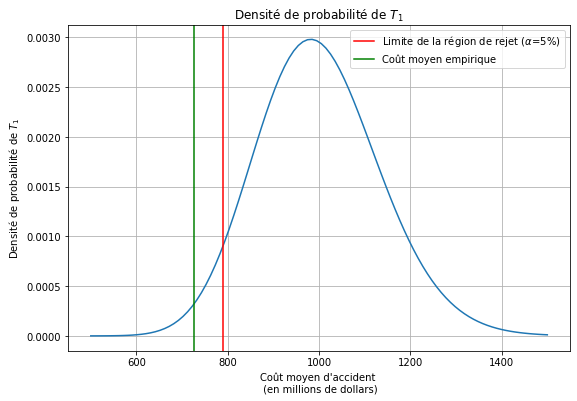

In [ ]:
x = np.linspace (500, 1500, 100)
y = stats.gamma.pdf(x, a, loc=0, scale=1/b)

plt.figure(figsize=(9, 6))

plt.plot(x, y)

plt.axvline(x=c, label='Limite de la région de rejet ($\\alpha$=5%)',color='r')
plt.axvline(x=avg_cost, label='Coût moyen empirique',color='g')

plt.title('Densité de probabilité de $T_1$')
plt.xlabel('Coût moyen d\'accident \n (en millions de dollars)')
plt.ylabel('Densité de probabilité de $T_1$')

plt.grid()
plt.legend(loc='upper right')

plt.show()

La région de rejet (au niveau $\alpha = 0,05$) est la région à gauche de la ligne **rouge**. Le coût correspondant au limite de la région de rejet est indiqué ci-dessous :

In [ ]:
print('Le coût correspondant au limite de la région de rejet est :\n', c)

Le coût correspondant au limite de la région de rejet est :
 789.0147974522822


La ligne verte répresent le coût moyen empirique, calculé avec les observations $x_1,x_2,...,x_{55}$ du vecteur de coûts (``costs``). Comme montré précédement, ce coût est égal à $726,34$ (en millions de dollars).

On peut noter que le coût empirique se trouve dans la région de rejet (car il est inférieur au coût correspondant au limite de la région de rejet, c'est-à-dire : $726,34 < 789,01$). Donc, on rejette l'hypothèse nulle.